In [1]:
%matplotlib inline

In [2]:
from sympy import *
from IPython.display import display, HTML
from rungekutta import R4K
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np

In [3]:
# Les angles sont des fonctions du temps
t = symbols('t')
th1 = Function('theta_1')(t)
th2 = Function('theta_2')(t)

# Constantes de longueur
l1, l2 = symbols('L_1 L_2')

# Fonction de leur position en fonction de l'angle (du temps)
x1 = l1 * sin(th1)
y1 = -l1 * cos(th1)
x2 = x1 + l2*sin(th2)
y2 = y1 - l2*cos(th2)

display(x1)
display(y2)

display(x2)
display(y2)

L_1*sin(theta_1(t))

-L_1*cos(theta_1(t)) - L_2*cos(theta_2(t))

L_1*sin(theta_1(t)) + L_2*sin(theta_2(t))

-L_1*cos(theta_1(t)) - L_2*cos(theta_2(t))

In [4]:
# On dérive pour obtenir les vitesses
vx1 = diff(x1, t)
vy1 = diff(y1, t)
vx2 = diff(x2, t)
vy2 = diff(y2, t)

In [5]:
# On dérive encore pour obtenir les accélérations
ax1 = diff(vx1, t)
ay1 = diff(vy1, t)
ax2 = diff(vx2, t)
ay2 = diff(vy2, t)

In [6]:
for i in [ax1, ay1, ax2, ay2]:
    display(i)

-L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2))

L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2

-L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) - L_2*sin(theta_2(t))*Derivative(theta_2(t), t)**2 + L_2*cos(theta_2(t))*Derivative(theta_2(t), (t, 2))

L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*sin(theta_2(t))*Derivative(theta_2(t), (t, 2)) + L_2*cos(theta_2(t))*Derivative(theta_2(t), t)**2

In [7]:
t1, t2 = symbols('T_1 T_2')
m1, m2 = symbols('m_1 m_2')
g = symbols('g')
eqx1 = Eq(m1*ax1, -t1*sin(th1) + t2*sin(th2))
eqy1 = Eq(m1*ay1, t1*cos(th1) - t2*cos(th2) - m1*g)

eqx2 = Eq(m2*ax2, -t2*sin(th2))
eqy2 = Eq(m2*ay2, t2*cos(th2) - m2*g)

In [8]:
for i in [eqx1, eqy1, eqx2, eqy2]:
    display(i)

Eq(m_1*(-L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2))), -T_1*sin(theta_1(t)) + T_2*sin(theta_2(t)))

Eq(m_1*(L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2), T_1*cos(theta_1(t)) - T_2*cos(theta_2(t)) - g*m_1)

Eq(m_2*(-L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) - L_2*sin(theta_2(t))*Derivative(theta_2(t), t)**2 + L_2*cos(theta_2(t))*Derivative(theta_2(t), (t, 2))), -T_2*sin(theta_2(t)))

Eq(m_2*(L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*sin(theta_2(t))*Derivative(theta_2(t), (t, 2)) + L_2*cos(theta_2(t))*Derivative(theta_2(t), t)**2), T_2*cos(theta_2(t)) - g*m_2)

In [9]:
t2sin = solve(eqx2, t2*sin(th2))[0]
t2cos = solve(eqy2, t2*cos(th2))[0]

In [10]:
eqx1 = eqx1.subs(t2*sin(th2), t2sin)
eqy1 = eqy1.subs(t2*cos(th2), t2cos)

In [11]:
for i in [eqx1, eqy1]:
    display(i)

Eq(m_1*(-L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2))), -T_1*sin(theta_1(t)) + m_2*(L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 - L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_2*sin(theta_2(t))*Derivative(theta_2(t), t)**2 - L_2*cos(theta_2(t))*Derivative(theta_2(t), (t, 2))))

Eq(m_1*(L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2), T_1*cos(theta_1(t)) - g*m_1 - m_2*(L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*sin(theta_2(t))*Derivative(theta_2(t), (t, 2)) + L_2*cos(theta_2(t))*Derivative(theta_2(t), t)**2 + g))

In [12]:
t1_1 = solve(eqx1, t1)[0]
t1_2 = solve(eqy1, t1)[0]

In [13]:
eq1 = Eq(t1_1, t1_2)
eq1

Eq((-L_1*m_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) - L_1*m_2*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*(m_1 + m_2)*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*m_2*sin(theta_2(t))*Derivative(theta_2(t), t)**2 - L_2*m_2*cos(theta_2(t))*Derivative(theta_2(t), (t, 2)))/sin(theta_1(t)), (L_1*m_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*m_2*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*(m_1 + m_2)*cos(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*m_2*sin(theta_2(t))*Derivative(theta_2(t), (t, 2)) + L_2*m_2*cos(theta_2(t))*Derivative(theta_2(t), t)**2 + g*m_1 + g*m_2)/cos(theta_1(t)))

In [14]:
t2_1 = solve(eqx2, t2)[0]
t2_2 = solve(eqy2, t2)[0]
eq2 = Eq(t2_1, t2_2)
eq2

Eq(m_2*(L_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 - L_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_2*sin(theta_2(t))*Derivative(theta_2(t), t)**2 - L_2*cos(theta_2(t))*Derivative(theta_2(t), (t, 2)))/sin(theta_2(t)), m_2*(L_1*sin(theta_1(t))*Derivative(theta_1(t), (t, 2)) + L_1*cos(theta_1(t))*Derivative(theta_1(t), t)**2 + L_2*sin(theta_2(t))*Derivative(theta_2(t), (t, 2)) + L_2*cos(theta_2(t))*Derivative(theta_2(t), t)**2 + g)/cos(theta_2(t)))

In [15]:
for i, j in solve((eq1, eq2), (th1.diff(t, 2), th2.diff(t, 2))).items():
    display(i)
    print('=')
    display(simplify(j))
th1_tt, th2_tt = map(simplify, solve((eq1, eq2), (th1.diff(t, 2), th2.diff(t, 2))).values())

Derivative(theta_1(t), (t, 2))

=


(L_1*m_2*sin(2*theta_1(t) - 2*theta_2(t))*Derivative(theta_1(t), t)**2 + 2*L_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + 2*g*m_1*sin(theta_1(t)) + g*m_2*sin(theta_1(t) - 2*theta_2(t)) + g*m_2*sin(theta_1(t)))/(L_1*(-2*m_1 + m_2*cos(2*theta_1(t) - 2*theta_2(t)) - m_2))

Derivative(theta_2(t), (t, 2))

=


(-2*L_1*m_1*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 - 2*L_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 - L_2*m_2*sin(2*theta_1(t) - 2*theta_2(t))*Derivative(theta_2(t), t)**2 - g*m_1*sin(2*theta_1(t) - theta_2(t)) + g*m_1*sin(theta_2(t)) - g*m_2*sin(2*theta_1(t) - theta_2(t)) + g*m_2*sin(theta_2(t)))/(L_2*(-2*m_1 + m_2*cos(2*theta_1(t) - 2*theta_2(t)) - m_2))

# Exemple

In [16]:
ll1 = 1
ll2 = 1
mm1 = 1
mm2 = 2
gg = 9.8

th1_tt = th1_tt.subs(((g, gg), (l1, ll1), (l2, ll2), (m1, mm1), (m2, mm2)))
th2_tt = th2_tt.subs(((g, gg), (l1, ll1), (l2, ll2), (m1, mm1), (m2, mm2)))
omega1, omega2 = symbols('omega_1 omega_2')
th1_tt = th1_tt.subs(((th1.diff(t), omega1), (th2.diff(t), omega2)))
th2_tt = th2_tt.subs(((th1.diff(t), omega1), (th2.diff(t), omega2)))

In [17]:
def omega_1(t, th1, th2, omeg1, omeg2):
    return omeg1
def omega_2(t, th1, th2, omeg1, omeg2):
    return omeg2

def alpha_1(time, t1, t2, omeg1, omeg2):
    return th1_tt.subs(((th1, t1), (th2, t2), (omega1, omeg1), (omega2, omeg2))).evalf()
def alpha_2(time, t1, t2, omeg1, omeg2):
    return th2_tt.subs(((th1, t1), (th2, t2), (omega1, omeg1), (omega2, omeg2))).evalf()

In [18]:
r4k = R4K(0.25, omega_1, omega_2, alpha_1, alpha_2)
r4k.set_init_vars(0, np.pi/2, 0, 0, 0)

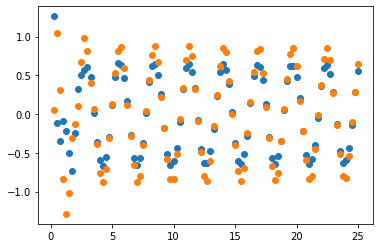

In [19]:
class_pts = []
for _ in range(100):
    n = r4k.step()
    class_pts.append(tuple(n))

class_pts = list(zip(*class_pts))
xs = class_pts[0]
for i in class_pts[1:3]:
    plt.plot(xs, i, 'o')
